#### TOC
[0. Import Libraries](#0.-Import-Libraries)

[1. Import Data](#1.-Import-Data)

[2. Data Exploration](#2.-Data-Exploration)

[3. Data Cleaning](#3.-Data-Cleaning)

[4. Data Preparation](#4.-Data-Preparation)

[5. Benchmark Model](#5.-Benchmark-Model)

[6. Feature Engineering](#6.-Feature-Engineering)

[7. Model Training](#7.-Model-Training)

[8. Tuning](#8.-Tuning)

[9. Conclusion](#9.-Conclusion)

# 0. Import Libraries

In order to read parquet format, must install pyarrow, no import is required.

[Back to Top](#TOC)

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import Data
From [New York City Taxi and Limousine Commission](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

[Back to Top](#TOC)

In [5]:
taxi_jan_2024 = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_2024])

In [6]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


# 2. Data Exploration

[Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

[Back to Top](#TOC)

In [7]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
                       'RatecodeID',  'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [9]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

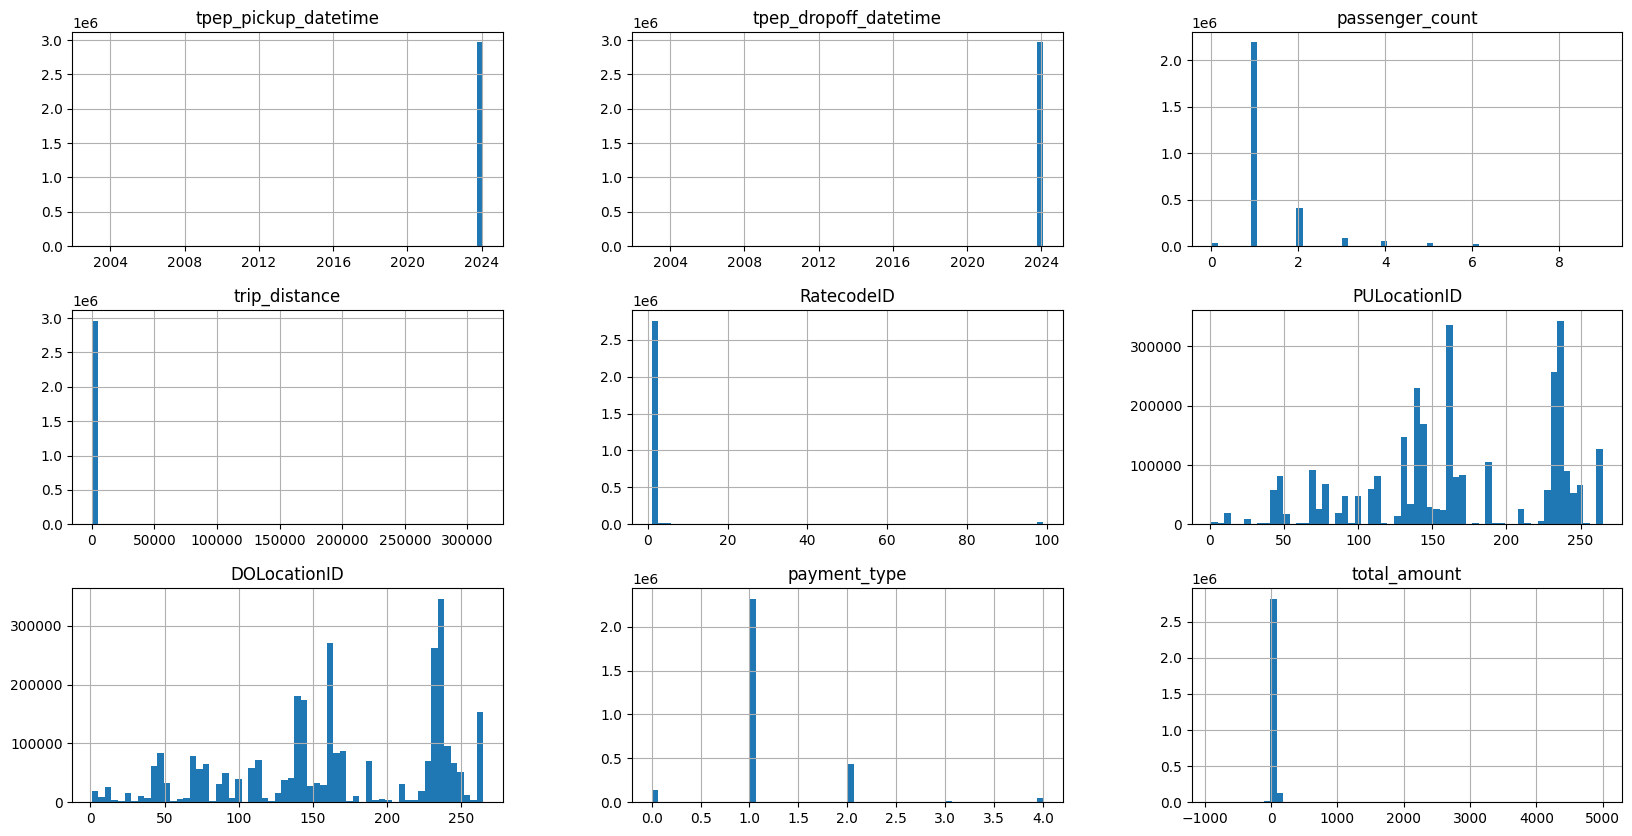

In [10]:
taxi_data.hist(figsize=(20,10), bins=60)

In [11]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

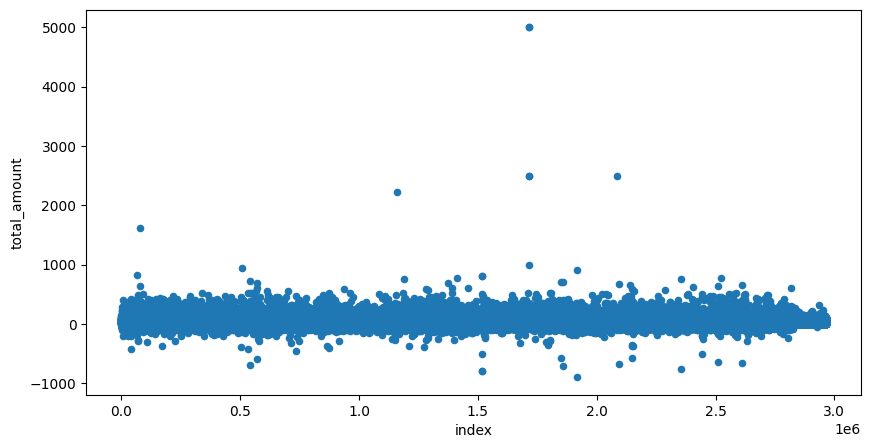

In [12]:
taxi_data.reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

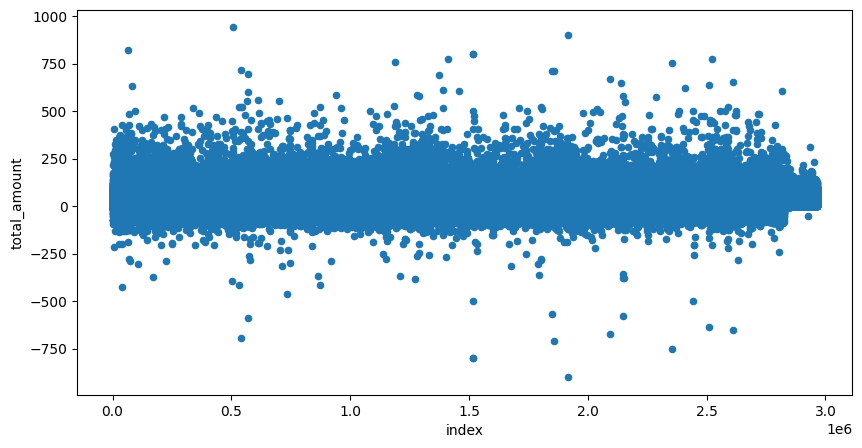

In [13]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

Investigate all negative values, doesn't make a lto of sense, refunds perhaps?

(35504, 9)


<Axes: xlabel='index', ylabel='total_amount'>

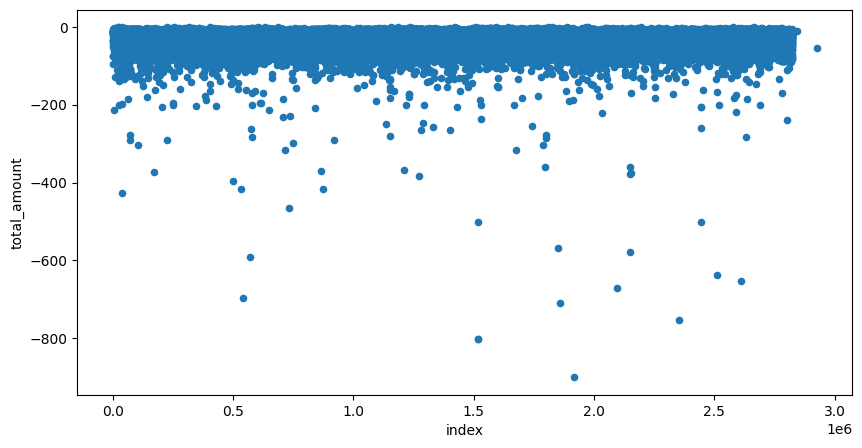

In [15]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter',y='total_amount',x='index',figsize=(10,5))

In [18]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [19]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

<Axes: >

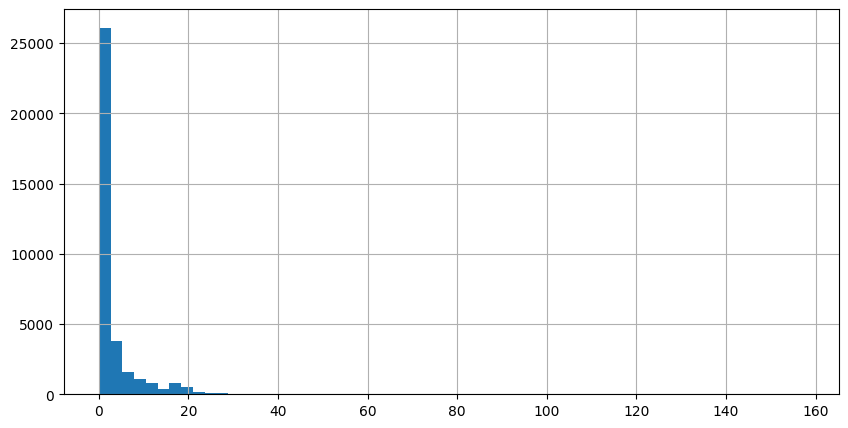

In [20]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))

Let's investigate the zero value charges as well.

# 3. Data Cleaning

[Back to Top](#TOC)

# 4. Data Preparation

[Back to Top](#TOC)

# 5. Benchmark Model

[Back to Top](#TOC)

# 6. Feature Engineering

[Back to Top](#TOC)

# 7. Model Training

[Back to Top](#TOC)

# 8. Tuning

[Back to Top](#TOC)

# 9. Conclusion

[Back to Top](#TOC)